# Proyek Analisis Data: E-Commerce
- **Nama:** Dimas Bagus Setya Putra
- **Email:** dimasbagus1263@gmail.com
- **ID Dicoding:** dimasbagus-sp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

1. Kategori produk apa yang memiliki jumlah pembelian terbanyak?
2. Jenis pembayaran apa yang sering digunakan oleh pembeli?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
order_items_df = pd.read_csv("/content/drive/MyDrive/DBS-MC/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
products_df = pd.read_csv("/content/drive/MyDrive/DBS-MC/Data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
category_translation_df = pd.read_csv("/content/drive/MyDrive/DBS-MC/Data/product_category_name_translation.csv")
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/DBS-MC/Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
orders_df = pd.read_csv("/content/drive/MyDrive/DBS-MC/Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

**DataFrame order_items_df**

In [10]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [11]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
print(f"Jumlah null: \n{order_items_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {order_items_df.duplicated().sum()}")

Jumlah null: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi: 0


**Insight:**
- Tidak ditemukan data null dan duplikasi pada dataframe order_items_df.



**DataFrame products_df**

In [13]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
print(f"Jumlah null: \n{products_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {products_df.duplicated().sum()}")

Jumlah null: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikasi: 0


**DataFrame order_payment_df**

In [16]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [17]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
print(f"Jumlah null: \n{order_payments_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {order_payments_df.duplicated().sum()}")

Jumlah null: 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi: 0


In [19]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
print(f"Jumlah null: \n{orders_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {orders_df.duplicated().sum()}")

Jumlah null: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah duplikasi: 0


### Cleaning Data

**Products_df**

In [22]:
products_df.dropna(inplace=True)
print(f"Jumlah null: \n{products_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {products_df.duplicated().sum()}")

Jumlah null: 
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Jumlah duplikasi: 0


**Insight:**
- Menghapus missing value

**orders_df**

In [23]:
orders_df.dropna(inplace=True)
print(f"Jumlah null: \n{orders_df.isnull().sum()}\n")
print(f"Jumlah duplikasi: {orders_df.duplicated().sum()}")

Jumlah null: 
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Jumlah duplikasi: 0


**Insight :**
- Menghapus missing value

In [24]:
#mengkonfirmasi tipe data agar sesuai
order_items_df["order_id"] = order_items_df["order_id"].astype(str)
order_items_df["product_id"] = order_items_df["product_id"].astype(str)
order_payments_df["payment_value"] = order_payments_df["payment_value"].astype(float)
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

## Exploratory Data Analysis (EDA)

### Mencari Jumlah Pesanan,Jumlah pesanan per_Item dan Pesanan Terkonfirmasi


In [25]:
print("Deskripsi Statistik Order Items:")
order_items_df.describe()

Deskripsi Statistik Order Items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [26]:
print("Deskripsi Statistik Order Payments:")
order_payments_df.describe()

Deskripsi Statistik Order Payments:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
confirm_buy = order_items_df.merge(order_payments_df, on="order_id", how="inner")
confirm_buy["confirm_buy"] = 1
print("Jumlah pesanan per-item yang telah terkonfirmasi pembayaran:", confirm_buy.shape[0])

Jumlah pesanan per-item yang telah terkonfirmasi pembayaran: 117601


In [28]:
confirm_buy_orders = confirm_buy["order_id"].nunique()
print("Jumlah pesanan yang telah terkonfirmasi pembayaran:", confirm_buy_orders)


Jumlah pesanan yang telah terkonfirmasi pembayaran: 98665


In [29]:
total_orders = order_items_df["order_id"].nunique()
print("Total jumlah pesanan dalam dataset:", total_orders)


Total jumlah pesanan dalam dataset: 98666


FREKUENSI JUMLAH ITEM DALAM SATU PESANAN


In [30]:
order_counts = order_items_df.groupby("order_id").size().reset_index(name="num_items")
order_counts = order_counts.groupby("num_items").size().reset_index(name="Frekuensi")

print("Distribusi Jumlah Item per Order:")
order_counts.sort_values("num_items")

Distribusi Jumlah Item per Order:


,num_items,Frekuensi
0,1,88863
1,2,7516
2,3,1322
3,4,505
4,5,204
5,6,198
6,7,22
7,8,8
8,9,3
9,10,8


**Insight:**
- Pada output diatas menunjukan bahwa frekuensi jumlah item dalam satu pesanan terbanyak adalah 1 item yaitu sebanyak 88.863.
- Jumlah pesanan yang ada pada dataset adalah sebanyak 98.666 transaksi
- Jumlah pesanan yang terkonfirmasi pembayaran adalah sebanyak 98.665 transaksi
- Terdapat 1 pesanan yang tidak terkonfirmasi pembayaran
- Jumlah pesanan per-item yang telah terkonfirmasi pembayaran adalah sebanyak 117.601

HASIL PENJUALAN PADA SETIAP KATEGORI PRODUK


In [31]:
merged_df = order_items_df.merge(products_df, on="product_id", how="left")
merged_df = merged_df.merge(category_translation_df, on="product_category_name", how="left")
category_sales = merged_df.groupby("product_category_name_english").size().reset_index(name="sales_count")

In [32]:
print("10 Kategori Produk dengan Penjualan Terbanyak:")
category_sales.sort_values("sales_count", ascending=False).head(10)

10 Kategori Produk dengan Penjualan Terbanyak:


,product_category_name_english,sales_count
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


PAYMENT METHOD YANG DIGUNAKAN OLEH PENGGUNA

In [33]:
payment_distribution = order_payments_df["payment_type"].value_counts().reset_index()
payment_distribution.columns = ["payment_type", "transaction_count"]

In [34]:
print("Distribusi Metode Pembayaran:")
payment_distribution

Distribusi Metode Pembayaran:


,payment_type,transaction_count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki jumlah pembelian terbanyak?

In [35]:
merged_df = order_items_df.merge(products_df, on="product_id", how="left")
merged_df = merged_df.merge(category_translation_df, on="product_category_name", how="left")
category_sales = merged_df["product_category_name_english"].value_counts().reset_index()
category_sales.columns = ["category", "sales_count"]

<ipython-input-36-a58524048105>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


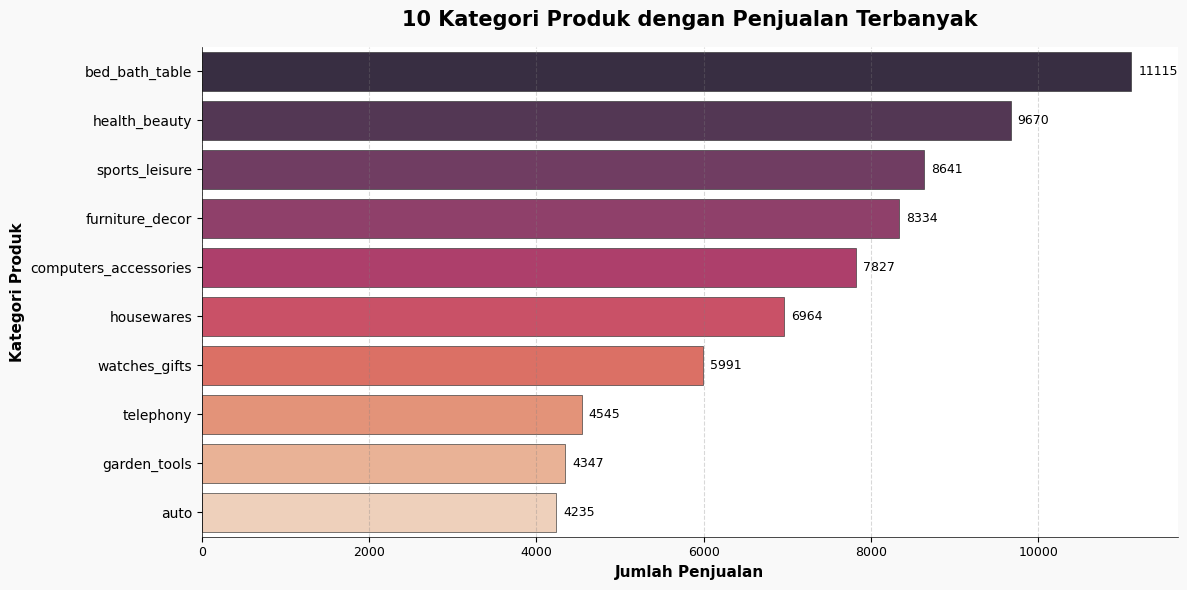

In [36]:
plt.figure(figsize=(12, 6), facecolor='#f9f9f9')
ax = sns.barplot(
    data=category_sales.head(10),
    x="sales_count",
    y="category",
    palette="rocket",
    edgecolor='.2',
    linewidth=0.5,
    alpha=0.9
)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)


for i in ax.containers:
    ax.bar_label(i, fmt='%d', padding=5, fontsize=9)

plt.grid(axis="x", linestyle="--", alpha=0.3, color='gray')


plt.xlabel("Jumlah Penjualan", fontsize=11, fontweight='bold')
plt.ylabel("Kategori Produk", fontsize=11, fontweight='bold')
plt.title("10 Kategori Produk dengan Penjualan Terbanyak", fontsize=15, fontweight='bold', pad=15)


plt.xticks(fontsize=9)
plt.yticks(fontsize=10)


plt.tight_layout()

plt.show()

**Insight:**
- Kategori Produk yang paling sering dibeli adalah Kategori Produk Bed bath table sebanyak 11.115


### Pertanyaan 2: Jenis pembayaran apa yang sering digunakan oleh pembeli?

In [37]:
payment_distribution = order_payments_df["payment_type"].value_counts().reset_index()
payment_distribution.columns = ["payment_type", "transaction_count"]

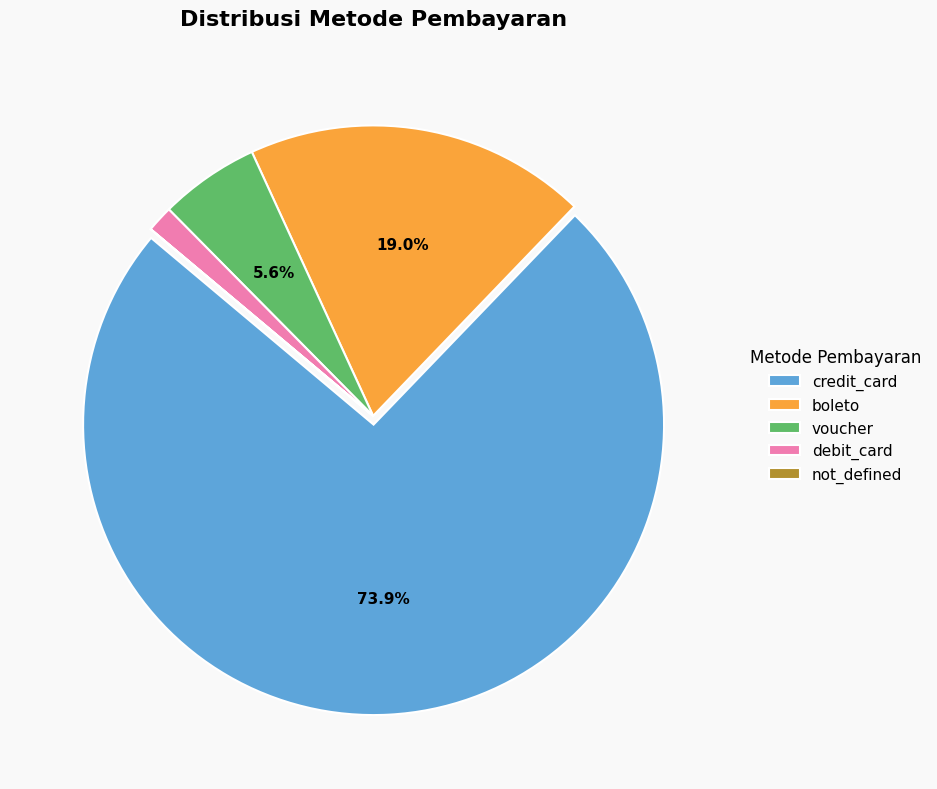

In [38]:
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#f9f9f9')

wedges, texts, autotexts = ax.pie(
    payment_distribution["transaction_count"],
    autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '',
    colors=["#5DA5DA", "#FAA43A", "#60BD68", "#F17CB0", "#B2912F", "#B276B2"],
    startangle=140,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'antialiased': True},
    shadow=False,
    explode=[0.03, 0, 0, 0, 0]
)

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

plt.title("Distribusi Metode Pembayaran", fontsize=16, fontweight='bold', pad=20)

ax.legend(
    wedges,
    payment_distribution["payment_type"],
    title="Metode Pembayaran",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    frameon=False,
    title_fontsize=12,
    fontsize=11
)

plt.tight_layout()

plt.show()

**Insight:**
- Metode pembayaran yang paling sering dipilih adalah credit card yaitu sebanyak 73,9%
- 19% pengguna menggunakan metode pembayaran boleto
- 5,6% pengguna menggunakan metode pembayaran voucher
- Kurang dari 3% pengguna menggunakan metode pembayaran debit card

## Analisis Lanjutan (Opsional)

### RFM ANALYSIS : Menghitung Recency, Frequency dan Monetary untuk mengetahui perilaku pelanggan terhadap  aplikasi e-commerce

In [39]:
rfm_df = orders_df[["order_id", "customer_id", "order_purchase_timestamp"]].merge(
    order_items_df, on="order_id", how="left"
).merge(
    order_payments_df, on="order_id", how="left"
)

# RFM Metrics
rfm_df = rfm_df.groupby("customer_id").agg({
    "order_purchase_timestamp": lambda x: (orders_df["order_purchase_timestamp"].max() - x.max()).days,
    "order_id": "nunique",  # Frequency: jumlah unik order yang dilakukan
    "payment_value": "sum"   # Monetary: total nilai pembayaran
}).reset_index()

rfm_df.columns = ["customer_id", "Recency", "Frequency", "Monetary"]

# Tampilan hasil
print("Ringkasan RFM Analysis:")
rfm_df.head()


Ringkasan RFM Analysis:


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


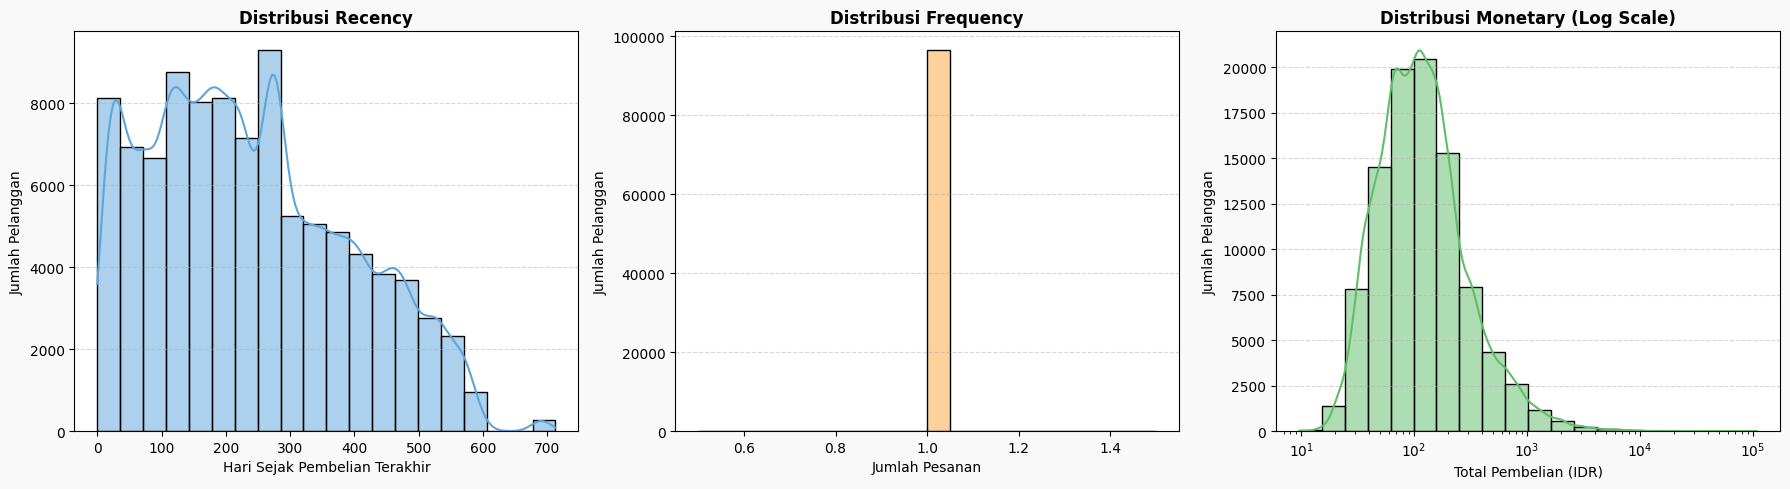

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='#f9f9f9')

# Diagram Recency
sns.histplot(rfm_df["Recency"], bins=20, kde=True, color="#5DA5DA", ax=axes[0])
axes[0].set_title("Distribusi Recency", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Hari Sejak Pembelian Terakhir")
axes[0].set_ylabel("Jumlah Pelanggan")

# Diagram Frequency
sns.histplot(rfm_df["Frequency"], bins=20, kde=True, color="#FAA43A", ax=axes[1])
axes[1].set_title("Distribusi Frequency", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Jumlah Pesanan")
axes[1].set_ylabel("Jumlah Pelanggan")

# Diagram Monetary (menggunakan skala log untuk distribusi lebih jelas)
sns.histplot(rfm_df[rfm_df["Monetary"] > 0]["Monetary"], bins=20, kde=True, color="#60BD68", ax=axes[2], log_scale=True)
axes[2].set_title("Distribusi Monetary (Log Scale)", fontsize=12, fontweight='bold')
axes[2].set_xlabel("Total Pembelian")
axes[2].set_ylabel("Jumlah Pelanggan")

# Menambahkan grid dan menampilkan plot
for ax in axes:
    ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

## Conclusion

- **Pertanyaan 1 : Kategori produk apa yang memiliki jumlah pembelian terbanyak?**

Dapat dilihat pada analisis data diatas, Kategori Produk yang paling banyak dibeli adalah Kategori Bed Bath Table yaitu sebanyak 11.115 transaksi.
- **Pada pertanyaan 2 : Jenis pembayaran apa yang sering digunakan oleh pembeli?**  

Dapat dilihat pada analisis Data diatas, metode pembayaran yang paling sering digunakan adalah menggunakan Credit Card yaitu sebanyak 73,9%

## Export data

In [41]:
orders_df.to_csv("./orders.csv", index=False)
order_items_df.to_csv("./order_items.csv", index=False)
products_df.to_csv("./products.csv", index=False)
category_translation_df.to_csv("./category.csv", index=False)
order_payments_df.to_csv("./payments.csv", index=False)